In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.preprocessing import LabelEncoder

In [2]:
#Columns for the data
#column_names = [
#    'AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 
#    'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT', 
#    'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWRT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 
#    'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 
#    'VETYN', 'WKSWORK', 'income', 'AHRSPAY', 'year'
# ]


In [3]:
# Load the data with the specified column names
# file_path_income_test = './census/census-income.test.csv'

file_path_income_data = './census/CensusIncomeData.csv'
file_path_income_test = './census/CensusIncomeTest.csv'

# df_census_income_test = pd.read_csv(file_path_income_test, names=column_names)
df_census_income_data = pd.read_csv(file_path_income_data)

df_census_income_test = pd.read_csv(file_path_income_test)

# Preview the dataset
# df_census_income_test.head()
df_census_income_data

df_census_income_test


,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,TAXINC,VETYN,WKSWORK,Year,Income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99757,14,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
99758,61,Private,8,36,11th grade,0,Not in universe,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,-50000
99759,24,Self-employed-not incorporated,1,43,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,...,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,94,-50000
99760,30,Private,45,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,-50000


In [4]:
# Review columns
df_census_income_data.columns


Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FEDTAX',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1',
       'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'TAXINC',
       'VETYN', 'WKSWORK', 'Year', 'Income'],
      dtype='object')

In [5]:
df_census_income_test.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FEDTAX',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1',
       'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'TAXINC',
       'VETYN', 'WKSWORK', 'Year', 'Income'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

label_encoders = {}

In [7]:
categorical_columns = df_census_income_data.select_dtypes(include=['object']).columns.tolist()

# categorical_columns

In [8]:
# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    # Initialize a new encoder for each column
    label_encoders[col] = LabelEncoder()
    
    # Fit and transform the training data
    df_census_income_data[col] = label_encoders[col].fit_transform(df_census_income_data[col])
    
    # Transform the test data (do NOT fit again to avoid leakage)
    df_census_income_test[col] = label_encoders[col].transform(df_census_income_test[col])


In [9]:
label_encoders['Income'].classes_

array([' 50000+.', '-50000'], dtype=object)

In [10]:
X_train = df_census_income_data.drop(columns=['Income'])
y_train = df_census_income_data['Income']

X_test = df_census_income_test.drop(columns=['Income'])
y_test = df_census_income_test['Income']

In [15]:
# Initialize the model
log_reg = LogisticRegression(solver='liblinear',max_iter=1000)

In [16]:
# Train the model
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [13]:
y_pred = log_reg.predict(X_test)

In [14]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9477255868968144


In [87]:
# Classification report
classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.27      0.39      6186
           1       0.95      0.99      0.97     93576

    accuracy                           0.95     99762
   macro avg       0.83      0.63      0.68     99762
weighted avg       0.94      0.95      0.94     99762



In [88]:
# Logistic Regression

# >50K Score(0)
# <50K Score(1)


# Clasification Report:   Precision 0.70 - out of all the instances <50K 70% were correcly classified.
#                         Recall:  0.27 - out of all the instances 27% were correclty classified.
#
# Observations:  - The model performs very well on class 1 (low income), but struggles with class 0 (high income), 
#                  as indicated by the lower precision, recall, and F1-score for class 0.
#                - Class imbalance: There are significantly more examples of class 1 (93,576) compared to class 0 (6,186), 
#                  which is likely affecting the model’s ability to detect class 0 correctly.


In [17]:
# Apply SMOTE to balance the classes in the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [18]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [19]:
# Initialize the model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)


In [20]:
# Train the model on the resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

In [22]:
# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.25      0.82      0.38      6186
           1       0.99      0.83      0.90     93576

    accuracy                           0.83     99762
   macro avg       0.62      0.83      0.64     99762
weighted avg       0.94      0.83      0.87     99762



In [23]:
#  Results of SMOTE 


# >50K Score(0)
# <50K Score(1)


#   1. Class 0 (Income above the threshold):
#      Precision: 0.25 (out of all instances predicted as class 0, 25% were correct).
#      Recall: 0.82 (82% of actual class 0 instances were correctly identified).
#      F1-score: 0.38 (the harmonic mean of precision and recall).
#   2. Class 1 (Income below the threshold):
#      Precision: 0.99 (99% of the instances predicted as class 1 were correct).
#      Recall: 0.83 (83% of actual class 1 instances were correctly identified).
#      F1-score: 0.90.

#   Accuracy: 0.83 (the model correctly classified 83% of all instances).


In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [26]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
# Train the model on the resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [29]:
# Evaluate the Random Forest model
classification_rep_rf = classification_report(y_test, y_pred_rf)
print(classification_rep_rf)

              precision    recall  f1-score   support

           0       0.59      0.51      0.55      6186
           1       0.97      0.98      0.97     93576

    accuracy                           0.95     99762
   macro avg       0.78      0.74      0.76     99762
weighted avg       0.94      0.95      0.95     99762



In [30]:
#  Random Forest model's classification report:

# >50K Score(0)
# <50K Score(1)

#   1. Class 0 (Income above the threshold):
#      Precision: 0.59 (59% of the instances predicted as class 0 were correct).
#      Recall: 0.51 (51% of actual class 0 instances were correctly identified).
#      F1-score: 0.55 (a balance between precision and recall).
#   2. Class 1 (Income below the threshold):
#      Precision: 0.97 (97% of the instances predicted as class 1 were correct).
#      Recall: 0.98 (98% of actual class 1 instances were correctly identified).
#      F1-score: 0.97 (excellent performance for class 1).

#   3. Overall Accuracy:
#      Accuracy: 0.95 (95% of all instances were correctly classified).

In [31]:
# XGBoost:

# Note: Install 
# C:\Users\malhe>pip install xgboost
# Collecting xgboost
#  Downloading xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
# Requirement already satisfied: numpy in c:\users\malhe\anaconda3\lib\site-packages (from xgboost) (1.26.4)
# Requirement already satisfied: scipy in c:\users\malhe\anaconda3\lib\site-packages (from xgboost) (1.11.4)
# Downloading xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
#   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 22.6 MB/s eta 0:00:00
# Installing collected packages: xgboost
# Successfully installed xgboost-2.1.1


from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [32]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [34]:
# Train the model on the resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)


C:\Users\malhe\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:22:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [35]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [36]:
# Evaluate the XGBoost model
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print(classification_rep_xgb)

              precision    recall  f1-score   support

           0       0.62      0.55      0.58      6186
           1       0.97      0.98      0.97     93576

    accuracy                           0.95     99762
   macro avg       0.80      0.76      0.78     99762
weighted avg       0.95      0.95      0.95     99762



In [37]:
# XGBoost model shows good performance overall, especially for the majority class (class 1)

# >50K Score(0)
# <50K Score(1)

#     1. Class 0 (Income above the threshold):
#        Precision: 0.62 (62% of the instances predicted as class 0 were correct).
#        Recall: 0.55 (55% of actual class 0 instances were correctly identified).
#        F1-score: 0.58 (a balance between precision and recall).
#     2. Class 1 (Income below the threshold):
#        Precision: 0.97 (97% of the instances predicted as class 1 were correct).
#        Recall: 0.98 (98% of actual class 1 instances were correctly identified).
#        F1-score: 0.97 (excellent performance for class 1).
# 3. Overall Accuracy: 0.95 (95% of all instances were correctly classified).

In [ ]:
# XGBoot model visualization

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

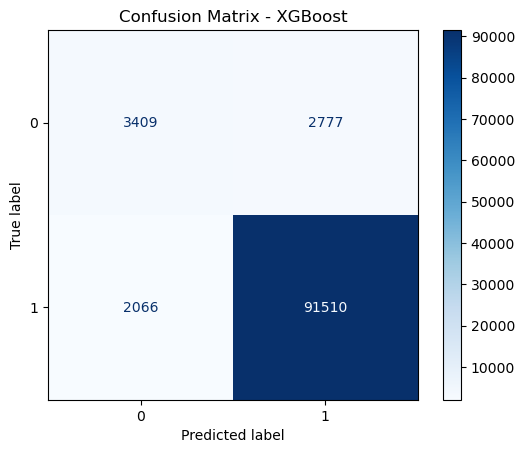

In [41]:
# Generate the confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, cmap='Blues')

plt.title('Confusion Matrix - XGBoost')
plt.show()

In [ ]:
# Confusion Matrix Results

In this case:

True Negatives (TN):  3409  were correctly predicted as >50K Score(0) high-income.
False Positives (FP): 2777  were incorrectly predicted as <50K Score(1) low-income.
False Negatives (FN): 2066  were incorrectly predicted as >50K (0) high-income. 
True Positives (TP): 91510  were correctly predicted as <50K low-income.

# Accuracy:  Accuracy = (TP + TN) / (TP + TN + FP + FN)

# Accuracy = (91510 + 3409) / (91510 + 3409 + 2777 + 2066) = 0.95  (95%)

# Precision >50K =  TP / (PT + FP) 

# Precision = 91510 / (91510 + 2777) = 0.970  (97%)



​



In [51]:
# ROC Curve and AUC Score
from sklearn.metrics import roc_curve, auc

In [52]:
# Predict probabilities for the positive class
y_pred_proba = xgb_model.predict_proba(X_test)[:, 0]

In [53]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

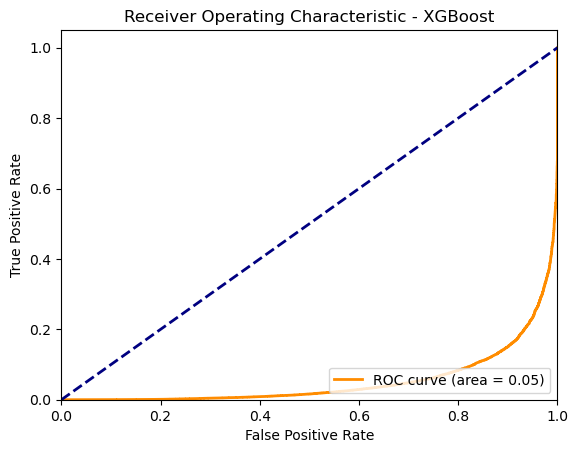

In [54]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc='lower right')
plt.show()

In [46]:
# Feature Importance
# Plot the ROC curve
from xgboost import plot_importance


<Figure size 1000x800 with 0 Axes>

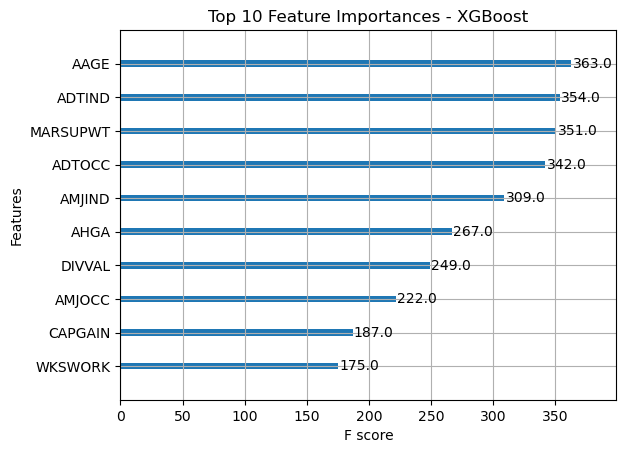

In [47]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=10)
plt.title('Top 10 Feature Importances - XGBoost')
plt.show()